Table of Content 
1. Importing libaries 
2.PII Identification
3.Creating Columns
 3.1 Creating a Region column
 3.2 creating a column with the department names
 3.3 creating Flag Columns 
4.Analysing spending habits
5.Dropping Rows
7.Exporting Data 
8.Preparing Customer Profiles
 8.1 Age Groups 
 8.2 Income Groups 
 8.3 Dependant Groups
 8.4 "having Baby" Groups 
9. family status 
10. creating specified customer profiles based on the customer profile preperations
11. Visualizations of Distributions 
12.Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
13.Comparing Customer Profiles with regions and departments



## importing libaries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
df=pd.read_pickle(r'/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_custs_merge.pkl')

## PII Identification 

In [3]:
#checking the data for PII 
column_names = df.columns.tolist()
print(column_names)

['product_id', 'product_name', 'aisle_id', 'department_id', 'prices', 'order_id', 'User Id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order', 'customer_type', 'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'user_mean_price', 'spending_type', 'order_frequency', 'frequency_flag', 'First Name', 'Surname', 'Gender', 'State', 'Age', 'Joining Date', 'Dependants', 'Family Status', 'Income', 'First Name ', '_merge']


"First Name" and "Surname" and "First Name" need to be removed to to privacy issues. "_merge" will be removed because its not of use anymore

In [5]:
#dropping the necessary columns
columns_to_drop = ['First Name','First Name ', 'Surname', '_merge']
df.drop(columns=columns_to_drop, inplace=True)

In [6]:
#checking if dropping was succesful 
column_names = df.columns.tolist()
print(column_names)

['product_id', 'product_name', 'aisle_id', 'department_id', 'prices', 'order_id', 'User Id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order', 'customer_type', 'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'user_mean_price', 'spending_type', 'order_frequency', 'frequency_flag', 'Gender', 'State', 'Age', 'Joining Date', 'Dependants', 'Family Status', 'Income']


# Creating Columns¶¶

## Creating a Region column

In [7]:
#create a “Region” column based on the “State” column.
#Use the region information: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [8]:
states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
df.loc[df['State'].isin(states), 'Region'] = 'Northeast'

states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
df.loc[df['State'].isin(states), 'Region'] = 'Midwest'

states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
df.loc[df['State'].isin(states), 'Region'] = 'South'

states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
df.loc[df['State'].isin(states), 'Region'] = 'West'

/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/498599872.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Northeast' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['State'].isin(states), 'Region'] = 'Northeast'


## creating a column with the department names

In [10]:
#creating a department column based on department_id 
#listing the ids and names 
department_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
department_names = ["frozen", "other", "bakery", "produce", "alcohol", "international", "beverages", "pets", "dry goods pasta",
                    "bulk", "personal care", "meat seafood", "pantry", "breakfast", "canned goods", "dairy eggs", "household",
                    "babies", "snacks", "deli", "missing"]

# Create a dictionary to map department IDs to department names
department_dict = dict(zip(department_ids, department_names)) 


# Map department IDs to department names and create a new 'Department' column
df['Department'] = df['department_id'].map(department_dict)

## creating flag columns ¶

Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [11]:
df.loc[df['max_order'] <5, 'activity_flag'] =  'low activity'
df.loc[df['max_order'] >=5, 'activity_flag'] =  'normal activity'

/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/4172152236.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'low activity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['max_order'] <5, 'activity_flag'] =  'low activity'


In [12]:
df['activity_flag'].value_counts(dropna = False)

activity_flag
normal activity    30964564
low activity        1440295
Name: count, dtype: int64

In [13]:
#creating a subset for low activity customers
df_low_activity = df[df['activity_flag'] =='low activity']

In [14]:
#creating a subset for normal activity customers\n",
df_normal_activity = df[df['activity_flag'] =='normal activity']

In [15]:
#Checking sum of both subsets\n",
len(df_low_activity) + len(df_normal_activity)

32404859

## Analysing spending habits

Determine whether there’s a difference in spending habits between the different U.S. regions.

In [17]:
# crossing "Region" column with the spending flag
crosstab = pd.crosstab(df['spending_type'], df['Region'], dropna = False)

In [18]:
#copy the table to the clipboard
crosstab.to_clipboard()

spending_type	Midwest	Northeast	South	West
High spender	155975	108225	209691	160354
Low spender	7441350	5614511	10582194	8132559


## Dropping Rows¶

In [19]:
# Filtering out rows with 'low activity' in 'activity_flag'
df_without_low_activity = df[~(df['activity_flag'] == 'low activity')]

## Exporting Data

In [20]:
path = '/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis'

In [21]:
#exporting normal activity dataframe
df_normal_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_normal_activity.pkl'))

In [22]:
#exporting normal activity dataframe
df_low_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_low_activity.pkl'))

In [23]:
df_without_low_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_custs_merge_without_low_activity.4.10.pkl'))

In [24]:
#for better workflow i assign df_without_low_activity to df_wla 
df_wla = df_without_low_activity 

# Preparing Customer Profiles

## Age Groups

In [25]:
#checking for min of Age column 
df_wla['Age'].min()

18

In [26]:
#checking for max of Age column
df_wla['Age'].max()

81

/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/3626699415.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wla['Age_Group'] = pd.cut(df_wla['Age'], bins=bins, labels=labels)


<Figure size 800x600 with 0 Axes>

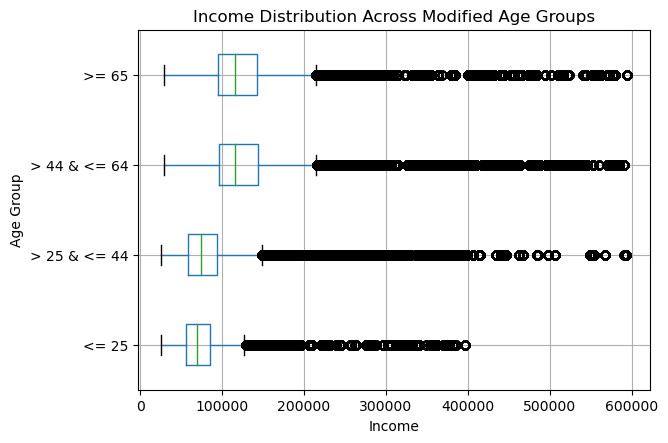

In [27]:
# Define age groups based on the specified criteria in order to create a box plot in order to be able to 
#see the income range of the different age groups 
# ( I use the following age groups for 3 customer profiles : 18-35, 25-40, 60+)


# bins and labels for age groups
bins = [0, 25, 44, 64, 150]
labels = ['<= 25', '> 25 & <= 44', '> 44 & <= 64', '>= 65']

# Assuming 'df_wla' is your DataFrame

# Aggregate 'age' column into new age groups
df_wla['Age_Group'] = pd.cut(df_wla['Age'], bins=bins, labels=labels)

# Create a box plot for income across the new age groups
plt.figure(figsize=(8, 6))
box_plot = df_wla.boxplot(column='Income', by='Age_Group', vert=False)
plt.xlabel('Income')
plt.ylabel('Age Group')
plt.title('Income Distribution Across Modified Age Groups')
plt.suptitle('')  # Remove default title
plt.show()

In [28]:
#creating an column with more detailed age labels 
df_wla.loc[df_wla['Age'] <= 25 , 'age_flag'] = 'Young adult'

df_wla.loc[(df_wla['Age'] > 25) & (df_wla['Age'] <= 44), 'age_flag'] = 'Adult'

df_wla.loc[(df_wla['Age'] > 44) & (df_wla['Age'] <= 64), 'age_flag'] = 'Middle-age'

df_wla.loc[df_wla['Age'] >= 65 , 'age_flag'] = 'Old age'

/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/1330340906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wla.loc[df_wla['Age'] <= 25 , 'age_flag'] = 'Young adult'
/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/1330340906.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Young adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_wla.loc[df_wla['Age'] <= 25 , 'age_flag'] = 'Young adult'


## Income Groups

In [29]:
#checking Income for min max and mean 

In [30]:
df_wla['Income'].min()

25903

In [31]:
df_wla['Income'].max()

593901

In [32]:
df_wla['Income'].mean()

99675.86510754681

-> Income ranges between  25,903𝑎𝑛𝑑
 593,901

In [33]:
#creating income groups 

In [34]:
#under $60K
df_wla.loc[df_wla['Income']<60000,'income_group']='lower income'

/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/1064811289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wla.loc[df_wla['Income']<60000,'income_group']='lower income'
/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/1064811289.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'lower income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_wla.loc[df_wla['Income']<60000,'income_group']='lower income'


In [35]:
#$60,000 and $150,000
df_wla.loc[(df_wla['Income']>=50000) & (df_wla['Income']<100000),'income_group']='middle income'

In [36]:
#$150,000 or more
df_wla.loc[df_wla['Income'] >= 100000, 'income_group'] = 'high income'

In [37]:
#checking the distribution of different incomes 
#Grouping by 'income_group' and counting the number of unique user IDs
df_wla.groupby('income_group')['User Id'].nunique().reset_index()

,income_group,User Id
0,high income,70081
1,lower income,25192
2,middle income,67358


## Dependant Groups¶

In [38]:
#checking Dependants column for min max and mean values  

In [39]:
df_wla['Dependants'].min()

0

In [40]:
df_wla['Dependants'].mean()

1.501819176268718

In [41]:
df_wla['Dependants'].max()

3

-> Depandant count ranges from 0 to 3 dependants

In [42]:
#No dependant group
df_wla.loc[df_wla['Dependants'] <= 0, 'dependants_group'] = 'no dependants'

/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/547225453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wla.loc[df_wla['Dependants'] <= 0, 'dependants_group'] = 'no dependants'
/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/547225453.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'no dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_wla.loc[df_wla['Dependants'] <= 0, 'dependants_group'] = 'no dependants'


In [43]:
#has dependants
df_wla.loc[df_wla['Dependants'] > 0, 'dependants_group'] = 'has dependants'

In [44]:
#checking the distribution of the two groups 
df_wla.groupby('dependants_group')['User Id'].nunique().reset_index()

,dependants_group,User Id
0,has dependants,121904
1,no dependants,40727


## "having Babies" Group¶¶

In [45]:
# Create 'has Baby' column based on 'department_id'
# 1.Check if each user ever ordered something with department_id equal to 18 (Baby)
user_ids_with_18 = df_wla.loc[df_wla['department_id'] == 18, 'User Id'].unique()
print(user_ids_with_18)

['15954' '39145' '50640' ... '168325' '160916' '175617']


In [46]:
#setting value by default False 
df_wla['has Baby']= False

/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/4143977444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wla['has Baby']= False


In [47]:
df_wla.loc[df_wla["User Id"].isin(user_ids_with_18), "has Baby"] = True

In [48]:
# Group by 'User Id' and count the occurrences of 'has Baby' values
df_wla.groupby('has Baby')['User Id'].nunique()

has Baby
False    132401
True      30230
Name: User Id, dtype: int64

-> There are 30230 Users who most liekly have a Baby -> There are 132401 Users who most likely have no Baby

In [49]:
#cheking the number of unique User Id's  to see if it fits the two numbers from above 
df_wla['User Id'].nunique()

162631

## family status

In [50]:
#Checking Family status counts
df_wla.groupby('Family Status')['User Id'].nunique()

Family Status
divorced/widowed                     13831
living with parents and siblings      7608
married                             114296
single                               26896
Name: User Id, dtype: int64

## creating specified customer profiles based on the customer profile preperations

In [51]:
#single young adult w/o dependants
df_wla.loc[(df_wla['age_flag']== 'Young adult') & 
           (df_wla['Family Status'].isin(['single', 'divorced/widowed'])) & 
           (df_wla['dependants_group'] == 'no dependants'),'customer_profiles']= 'single young adult w/o dependants'

#single adult w/o dependants
df_wla.loc[(df_wla['age_flag'].isin(['Adult'])) & 
           (df_wla['Family Status'].isin(['single', 'divorced/widowed'])) & 
           (df_wla['dependants_group'] == 'no dependants'),'customer_profiles']= 'single adult w/o dependants'

#single Middle-age adult w/o dependants
df_wla.loc[(df_wla['age_flag'].isin(['Middle-age'])) & 
           (df_wla['Family Status'].isin(['single', 'divorced/widowed'])) & 
           (df_wla['dependants_group'] == 'no dependants'),'customer_profiles']= 'single  middle-age adult w/o dependants'

#single Old age adult w/o dependants
df_wla.loc[(df_wla['age_flag'].isin(['Old age'])) & 
           (df_wla['Family Status'].isin(['single', 'divorced/widowed'])) & 
           (df_wla['dependants_group'] == 'no dependants'),'customer_profiles']= 'single old age adult w/o dependants'

#married young adult with dependants
df_wla.loc[(df_wla['age_flag']== 'Young adult') & 
           (df_wla['Family Status']== 'married') & 
           (df_wla['dependants_group'] == 'has dependants'),'customer_profiles']= 'married young adult with dependants'


#married adult with dependants
df_wla.loc[(df_wla['age_flag']== 'Adult') & 
           (df_wla['Family Status']== 'married') & 
           (df_wla['dependants_group'] == 'has dependants'),'customer_profiles']= 'married  adult with dependants'

#young person with Baby 
df_wla.loc[(df_wla['age_flag']== 'Young adult') & 
           (df_wla['has Baby']== True), 'customer_profiles']= 'young person with Baby'


#adult person with baby 
df_wla.loc[(df_wla['age_flag']== 'Adult') & 
           (df_wla['has Baby']== False), 'customer_profiles']= 'adult person with Baby'
           

/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/3385819185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wla.loc[(df_wla['age_flag']== 'Young adult') &
/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_36274/3385819185.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'single young adult w/o dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_wla.loc[(df_wla['age_flag']== 'Young adult') &


## Visualizations of Distributions

Distribution of Age Groups

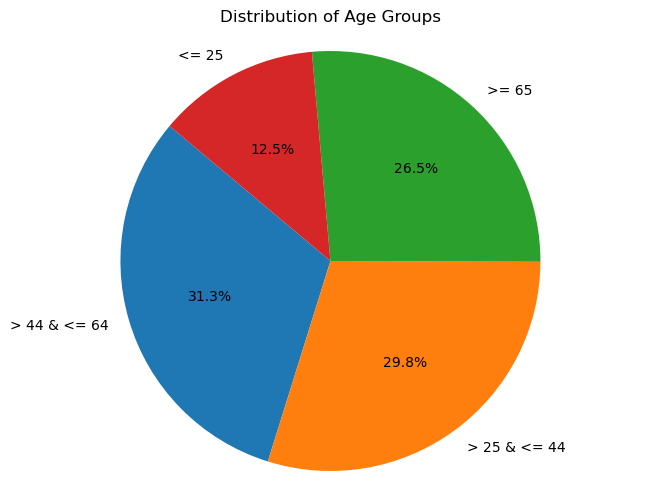

In [52]:
# Calculate counts for each age group
age_group_counts = df_wla['Age_Group'].value_counts()
## Calculate counts of unique User Ids for each age group
#unique_users_age_group = df_wla.groupby('Age_Group')['User Id'].nunique()  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Pie chart plot
distribution_age=plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Age Groups')
plt.savefig(os.path.join('/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/04 Analysis /Visualizations', 'distribution_age.png'), bbox_inches='tight')
plt.show()

In [53]:
#saving the visualization 
distribution_income=plt.savefig('distribution_income.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Income')

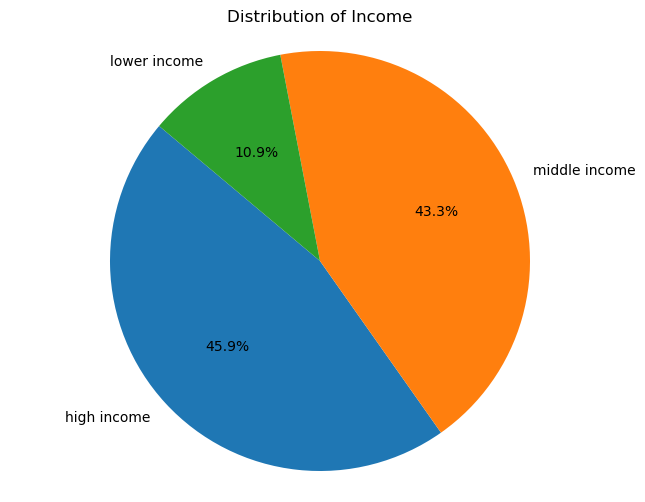

In [56]:
# Calculate counts for each age group
income_group_counts = df_wla['income_group'].value_counts()
# Save the pie chart as an image file in the visualization folder
plt.figure(figsize=(8, 6))
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Income')

"Persons who most likely have a baby" Distribution

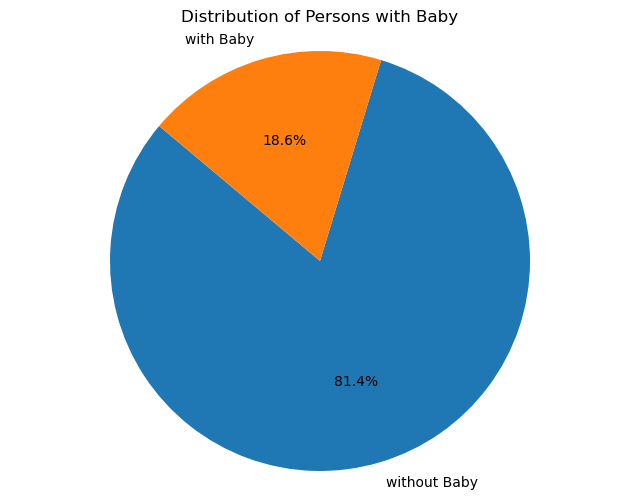

In [57]:
unique_users = df_wla.groupby('has Baby')['User Id'].nunique()

# Pie chart plot
custom_labels = ['without Baby', 'with Baby']
plt.figure(figsize=(8, 6))
plt.pie(unique_users, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Persons with Baby')
plt.savefig(os.path.join('/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/04 Analysis /Visualizations', 'Person with Baby.png'), bbox_inches='tight')
plt.show()

## Barchart Customer Profile Distribution 

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


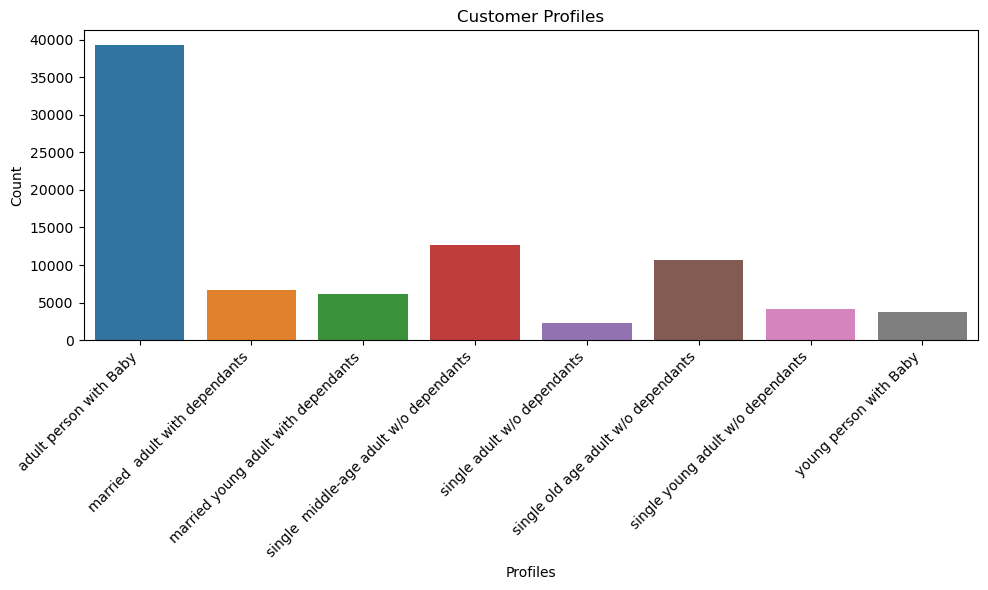

In [59]:
# Count occurrences of each customer profile
profile_counts=df_wla.groupby('customer_profiles')['User Id'].nunique()
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=profile_counts.index, y=profile_counts.values)
plt.title('Customer Profiles')
plt.xlabel('Profiles')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-labels for better readability
plt.tight_layout()
plt.savefig(os.path.join('/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/04 Analysis /Visualizations', 'Costumer_profiles_distribution.png'), bbox_inches='tight')
plt.show()

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


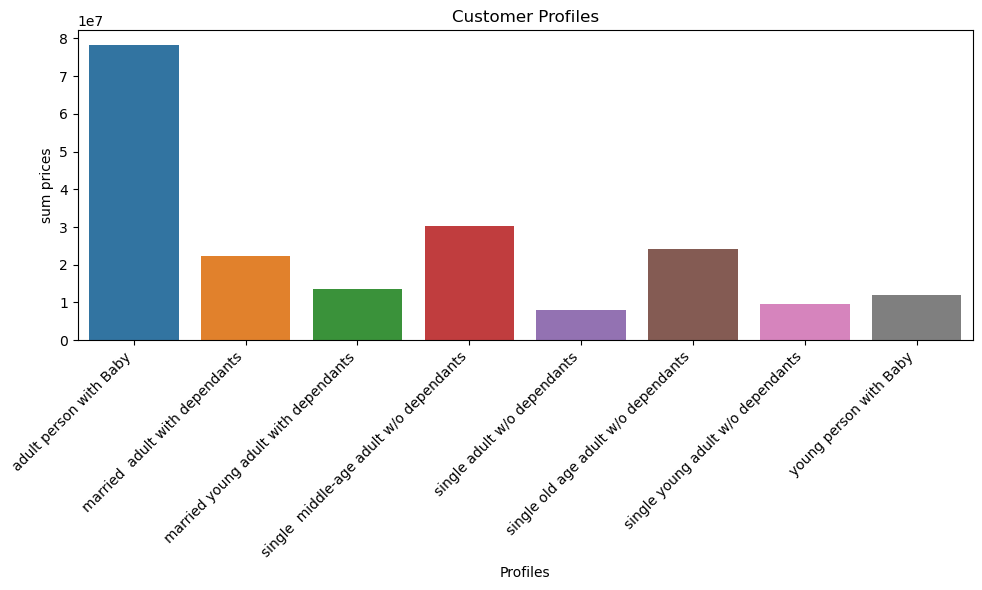

In [60]:
# Sum of prices of each customer profile
sum_prices=df_wla.groupby('customer_profiles')['prices'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sum_prices.index, y=sum_prices.values)
plt.title('Customer Profiles')
plt.xlabel('Profiles')
plt.ylabel('sum prices')
plt.xticks(rotation=45, ha='right') # Rotate x-labels for better readability
plt.tight_layout()
plt.savefig(os.path.join('/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/04 Analysis /Visualizations', 'Costumer_profiles_distribution.png'), bbox_inches='tight')
plt.show()

## Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [61]:
#USAGE FREQUENCY 
# Calculate the mean, minimum and maximum order frequency for each customer profile
min_order_per_customer_profile = df_wla.groupby('customer_profiles')['days_since_last_order'].min()
max_order_per_customer_profile = df_wla.groupby('customer_profiles')['days_since_last_order'].max()
mean_order_per_customer_profile = df_wla.groupby('customer_profiles')['days_since_last_order'].mean()

# Display the results
print("Minimum order frequency for each customer profile:")
print(min_order_per_customer_profile)

print("Maximum order frequency for each customer profile:")
print(max_order_per_customer_profile)

print("Mean order frequency for each customer profile:")
print(mean_order_per_customer_profile)

Minimum order frequency for each customer profile:
customer_profiles
adult person with Baby                     0.0
married  adult with dependants             0.0
married young adult with dependants        0.0
single  middle-age adult w/o dependants    0.0
single adult w/o dependants                0.0
single old age adult w/o dependants        0.0
single young adult w/o dependants          0.0
young person with Baby                     0.0
Name: days_since_last_order, dtype: float64
Maximum order frequency for each customer profile:
customer_profiles
adult person with Baby                     30.0
married  adult with dependants             30.0
married young adult with dependants        30.0
single  middle-age adult w/o dependants    30.0
single adult w/o dependants                30.0
single old age adult w/o dependants        30.0
single young adult w/o dependants          30.0
young person with Baby                     30.0
Name: days_since_last_order, dtype: float64
Mean order fre

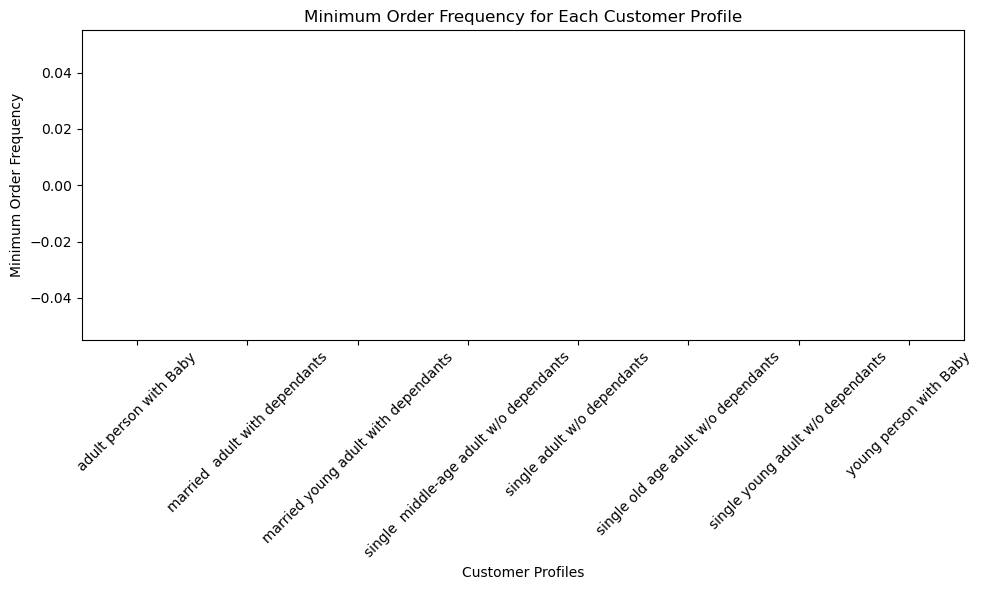

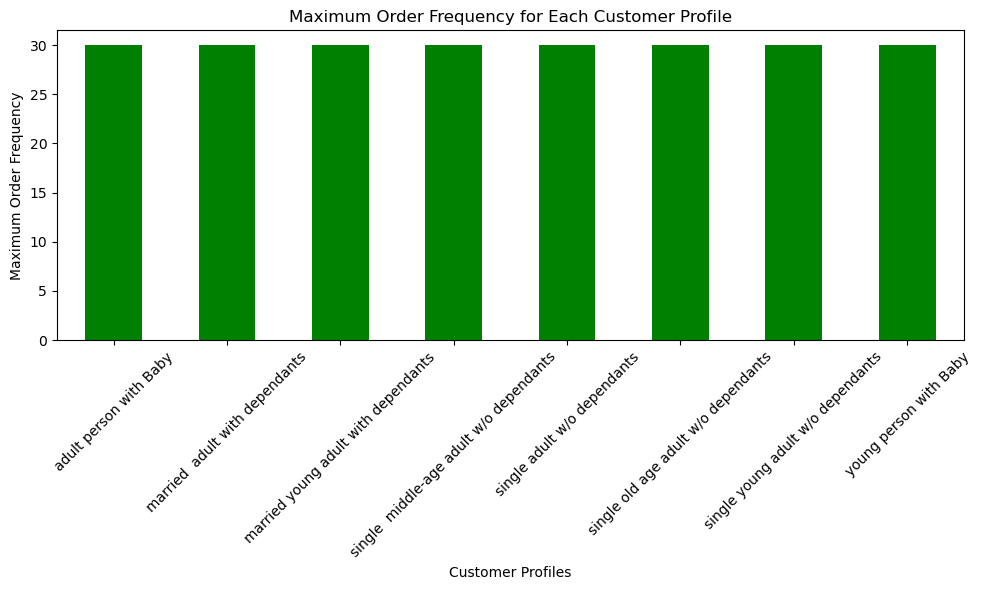

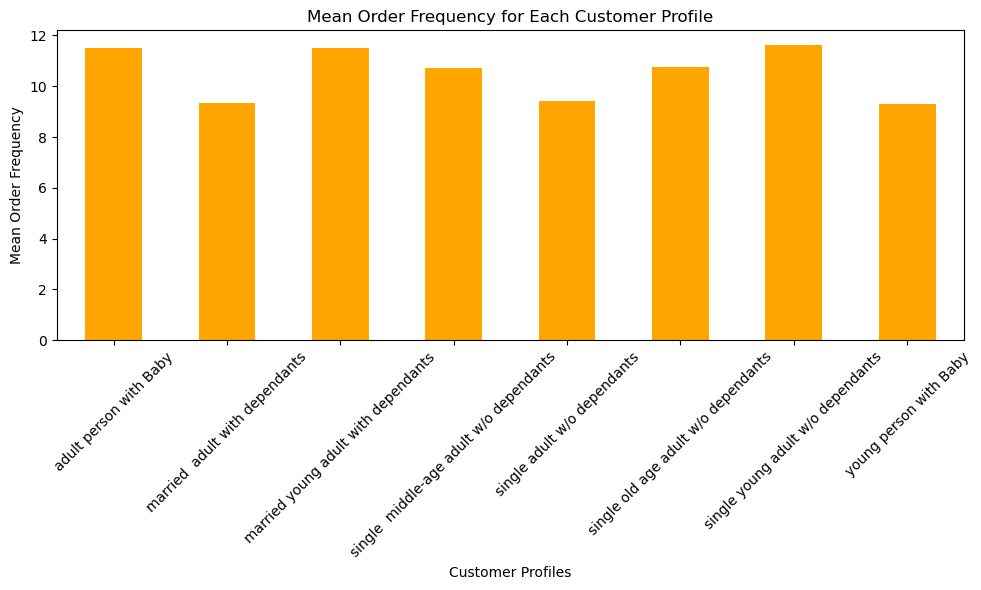

In [62]:
# Plotting minimum order frequency for each customer profile
plt.figure(figsize=(10, 6))
min_order_per_customer_profile.plot(kind='bar', color='blue')
plt.title('Minimum Order Frequency for Each Customer Profile')
plt.xlabel('Customer Profiles')
plt.ylabel('Minimum Order Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join('/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/04 Analysis /Visualizations', 'Minimum Order Frequency for Each Customer Profile.png'), bbox_inches='tight')
plt.show()

# Plotting maximum order frequency for each customer profile
plt.figure(figsize=(10, 6))
max_order_per_customer_profile.plot(kind='bar', color='green')
plt.title('Maximum Order Frequency for Each Customer Profile')
plt.xlabel('Customer Profiles')
plt.ylabel('Maximum Order Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join('/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/04 Analysis /Visualizations', 'Maximum Order Frequency for Each Customer Profile.png'), bbox_inches='tight')
plt.show()

# Plotting mean order frequency for each customer profile
plt.figure(figsize=(10, 6))
mean_order_per_customer_profile.plot(kind='bar', color='orange')
plt.title('Mean Order Frequency for Each Customer Profile')
plt.xlabel('Customer Profiles')
plt.ylabel('Mean Order Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join('/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/04 Analysis /Visualizations', 'Mean Order Frequency for Each Customer Profile.png'), bbox_inches='tight')
plt.show()

In [63]:
# EXPENDITURE 
# Calculate the mean, minimum and maximum prices for each customer profile
min_order_per_customer_profile = df_wla.groupby('customer_profiles')['prices'].min()
max_order_per_customer_profile = df_wla.groupby('customer_profiles')['prices'].max()
mean_order_per_customer_profile = df_wla.groupby('customer_profiles')['prices'].mean()

# Display the results
print("Minimum price for each customer profile:")
print(min_order_per_customer_profile)

print("Maximum price for each customer profile:")
print(max_order_per_customer_profile)

print("Mean price for each customer profile:")
print(mean_order_per_customer_profile)

Minimum price for each customer profile:
customer_profiles
adult person with Baby                     1.0
married  adult with dependants             1.0
married young adult with dependants        1.0
single  middle-age adult w/o dependants    1.0
single adult w/o dependants                1.0
single old age adult w/o dependants        1.0
single young adult w/o dependants          1.0
young person with Baby                     1.0
Name: prices, dtype: float64
Maximum price for each customer profile:
customer_profiles
adult person with Baby                     99999.0
married  adult with dependants             99999.0
married young adult with dependants        99999.0
single  middle-age adult w/o dependants    99999.0
single adult w/o dependants                99999.0
single old age adult w/o dependants        99999.0
single young adult w/o dependants          99999.0
young person with Baby                     99999.0
Name: prices, dtype: float64
Mean price for each customer profile:
cu

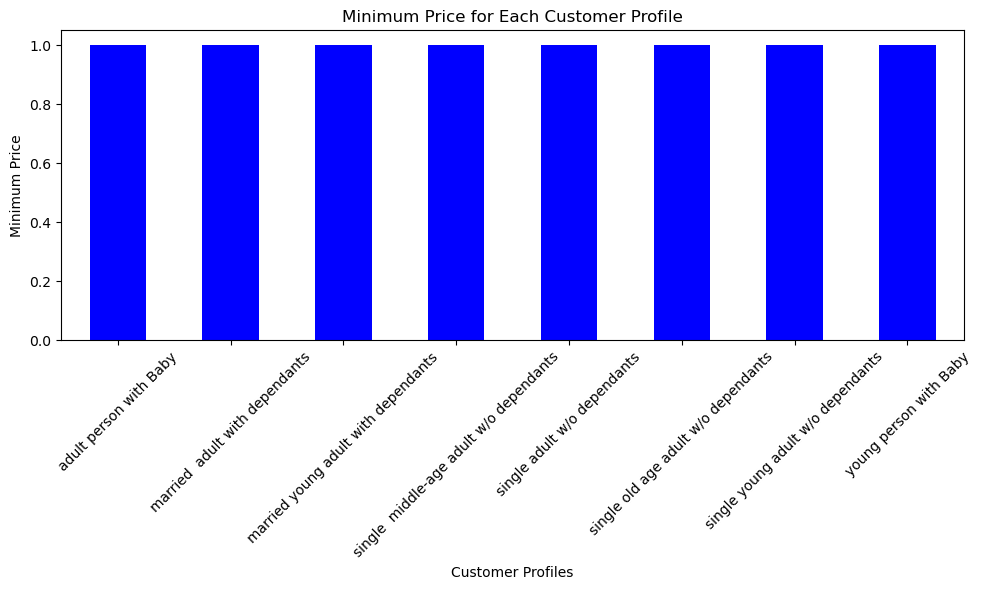

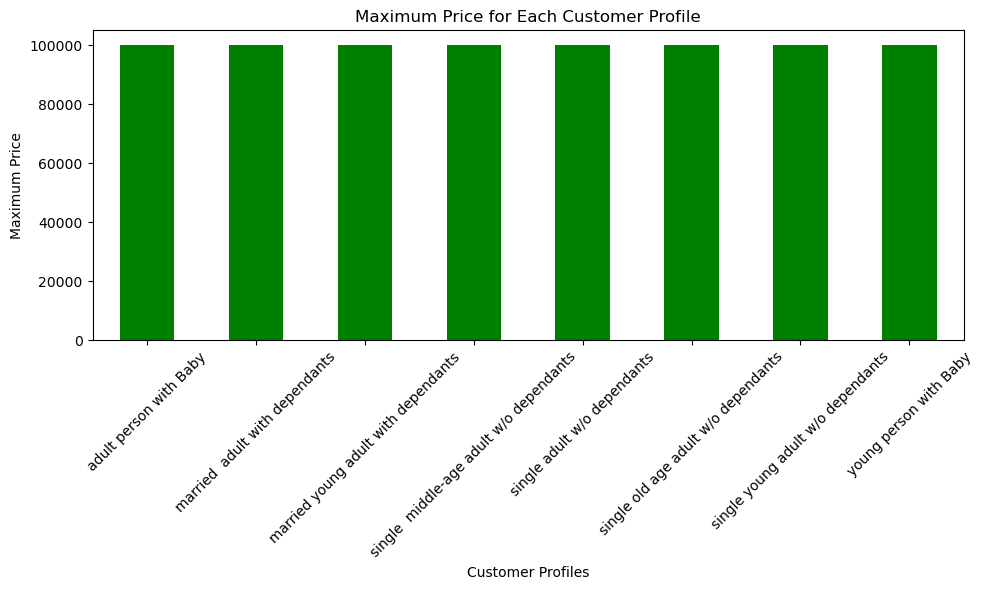

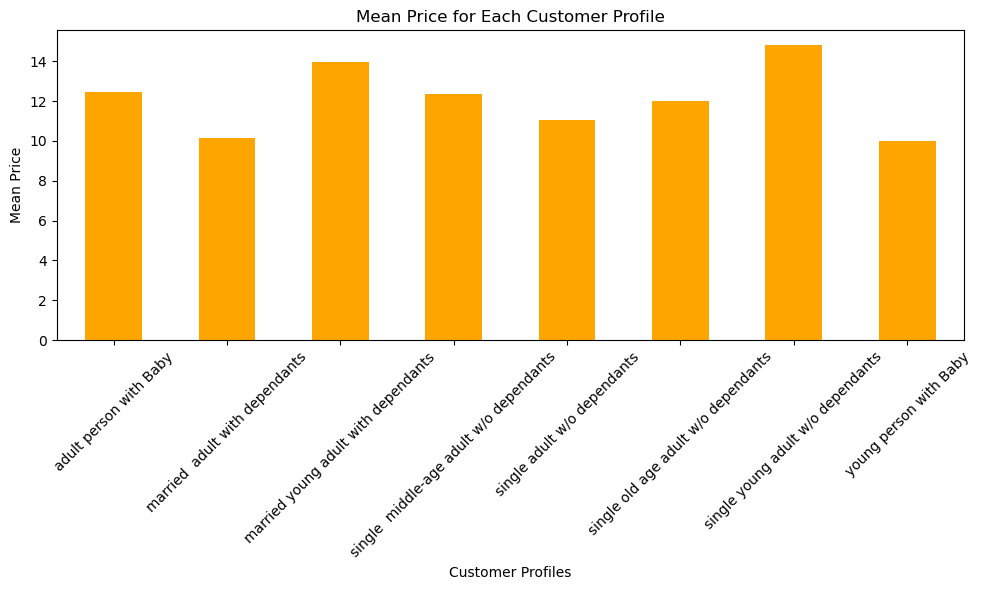

In [64]:
# Plotting minimum prices for each customer profile
plt.figure(figsize=(10, 6))
min_order_per_customer_profile.plot(kind='bar', color='blue')
plt.title('Minimum Price for Each Customer Profile')
plt.xlabel('Customer Profiles')
plt.ylabel('Minimum Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join('/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/04 Analysis /Visualizations', 'Minimum Price for Each Customer Profile.png'), bbox_inches='tight')
plt.show()

# Plotting maximum prices for each customer profile
plt.figure(figsize=(10, 6))
max_order_per_customer_profile.plot(kind='bar', color='green')
plt.title('Maximum Price for Each Customer Profile')
plt.xlabel('Customer Profiles')
plt.ylabel('Maximum Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join('/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/04 Analysis /Visualizations', 'Maximum Price for Each Customer Profile.png'), bbox_inches='tight')
plt.show()

# Plotting mean prices for each customer profile
plt.figure(figsize=(10, 6))
mean_order_per_customer_profile.plot(kind='bar', color='orange')
plt.title('Mean Price for Each Customer Profile')
plt.xlabel('Customer Profiles')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join('/Users/bente/careerfoundry /exercise 4/Ex.4_25-10-2023 Instacart Basket Analysis/04 Analysis /Visualizations', 'Mean Price for Each Customer Profile.png'), bbox_inches='tight')
plt.show()

## Comparing Customer Profiles with regions and departments

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [65]:
crosstab = pd.crosstab(df_wla['customer_profiles'], df_wla['Department'], dropna = True)
crosstab.to_clipboard() 

-> The south has the highest share of the created customer profiles without exception. Followed by the west and midwest.